## History
  
- before 19th century: the only form of magnetism known was ferromagnetism.

## Earth magnetic field

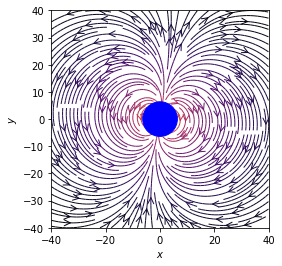

In [2]:
# code copied from https://scipython.com/blog/visualizing-the-earths-magnetic-field/

import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Mean magnitude of the Earth's magnetic field at the equator in T
B0 = 3.12e-5
# Radius of Earth, Mm (10^6 m: mega-metres!)
RE = 6.370
# Deviation of magnetic pole from axis
alpha = np.radians(9.6)

def B(r, theta):
    """Return the magnetic field vector at (r, theta)."""
    fac = B0 * (RE / r)**3
    return -2 * fac * np.cos(theta + alpha), -fac * np.sin(theta + alpha)

# Grid of x, y points on a Cartesian grid
nx, ny = 64, 64
XMAX, YMAX = 40, 40
x = np.linspace(-XMAX, XMAX, nx)
y = np.linspace(-YMAX, YMAX, ny)
X, Y = np.meshgrid(x, y)
r, theta = np.hypot(X, Y), np.arctan2(Y, X)

# Magnetic field vector, B = (Ex, Ey), as separate components
Br, Btheta = B(r, theta)
# Transform to Cartesian coordinates: NB make North point up, not to the right.
c, s = np.cos(np.pi/2 + theta), np.sin(np.pi/2 + theta)
Bx = -Btheta * s + Br * c
By = Btheta * c + Br * s

fig, ax = plt.subplots()

# Plot the streamlines with an appropriate colormap and arrow style
color = 2 * np.log(np.hypot(Bx, By))
ax.streamplot(x, y, Bx, By, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add a filled circle for the Earth; make sure it's on top of the streamlines.
ax.add_patch(Circle((0,0), RE, color='b', zorder=100))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-XMAX, XMAX)
ax.set_ylim(-YMAX, YMAX)
ax.set_aspect('equal')
plt.show()

## Resources <small>(magnetic domain)</small>
- simulation https://web.ics.purdue.edu/~dsederbe/?page_id=47
- paper electric and magnetic domains inverted http://mundy.physics.harvard.edu/Papers/Heron_Nature_2018.pdf
- site simple https://www.utm.edu/staff/cerkal/magnetic.htm
- paper domain structure https://arxiv.org/pdf/1502.01422.pdf
- page magnetic domain image http://physics.unl.edu/~shliou/ResearchActivity/research3.htm
- page magnetism https://www.rpi.edu/dept/phys/ScIT/InformationStorage/faraday/magnetism_a.html

## Resources <small>(why do magnets induce current?</small>
- quora https://www.quora.com/Why-does-a-changing-magnetic-field-induce-a-current
- stackexchange https://physics.stackexchange.com/questions/65335/how-do-moving-charges-produce-magnetic-fields
- stackexchange https://physics.stackexchange.com/questions/3618/can-maxwells-equations-be-derived-from-coulombs-law-and-special-relativity
- stackexchange https://physics.stackexchange.com/questions/284261/why-does-a-changing-magnetic-field-produce-a-current

## Resources <small>(tbd)</small>
- https://physics.stackexchange.com/questions/110428/is-an-electron-attracted-to-one-of-the-magnetic-poles-in-this-scenario
- strength of magnetic field vs electric field https://physics.stackexchange.com/questions/128512/why-are-magnetic-fields-so-much-weaker-than-electric